In [1]:
%matplotlib inline
import networkx as nx
import math
from matplotlib import pyplot as plt
from collections import deque
from heapq import heappop, heappush

In [2]:
def heuristic(a, b):
    min_weight = min(i['weight'] for _, _, i in graph.edges(data=True))  # Smallest weight in graph
    estimated_dist = nx.shortest_path_length(graph, source=a, target=b)  # Estimated hops
    return min_weight * estimated_dist  # Approximate remaining cost

# astar algorithm 
def astar(graph, start, goal='10'):
    priority_queue = []
    heappush(priority_queue, (0, start))  # (f-cost, node)

    g_cost = {start: 0}  # Actual cost from start
    visited = {}  # Track path

    while len(priority_queue) > 0:
        _, current = heappop(priority_queue)  # Get node with lowest f-cost

        if current == goal:
            # Reconstruct path
            path = []
            while current in visited:
                path.append(current)
                current = visited[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor in graph.neighbors(current):
            new_g = g_cost[current] + graph[current][neighbor]["weight"]  # g-cost update

            if neighbor not in g_cost or new_g < g_cost[neighbor]:
                g_cost[neighbor] = new_g
                f_cost = new_g + heuristic(neighbor, goal)
                heappush(priority_queue, (f_cost, neighbor))
                visited[neighbor] = current

    return None  # No path found


<Figure size 800x600 with 0 Axes>

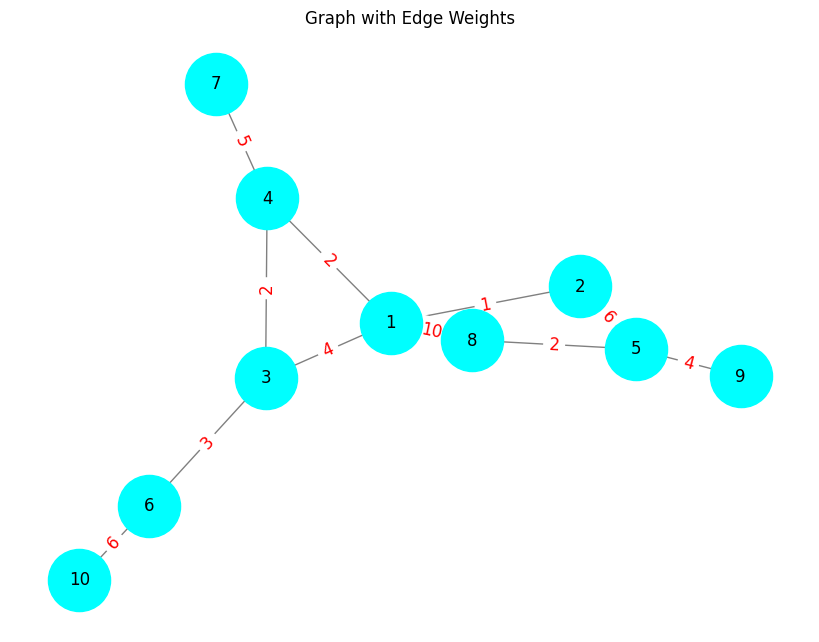

In [6]:
graph = nx.Graph()

# Define edges without weights
# edges = [
#     ('1', '2'), ('1', '3'), ('1', '4'),
#     ('2', '5'),
#     ('3', '6'),
#     ('4', '7'),
#     ('5', '8'), ('5', '9'),
#     ('6', '10')
# ]

# Define edges with weights
edges = [
    ('1', '2', 1), ('1', '3', 4), ('1', '4', 2), ('1', '8', 10),
    ('2', '5', 6),
    ('3', '6', 3), ('3', '4', 2),
    ('4', '7', 5), 
    ('5', '8', 2), ('5', '9', 4),
    ('6', '10', 6)
]

# Add edges with weights
graph.add_weighted_edges_from(edges)

# Add edges without weights
# graph.add_edges_from(edges)

# Define node positions for Euclidean heuristic
# positions = {
#     '1': (0, 0), '2': (1, 1), '3': (2, 1), '4': (0, 2),
#     '5': (2, 2), '6': (3, 2), '7': (0, 3),
#     '8': (2, 3), '9': (3, 3), '10': (4, 3)
# }

# Draw the Graph
plt.figure(figsize=(8, 6))
# Define positions for nodes
pos = nx.spring_layout(graph)  # Generates a layout for visualization

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(graph, pos, with_labels=True, node_color="aqua", edge_color="gray", node_size=2000, font_size=12)

# Extract edge weights and display them
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=12, font_color="red")

plt.title("Graph with Edge Weights")
plt.show()

In [4]:
# call astar function

astar(graph, '1')

['1', '3', '6', '10']